# Data Split - Automatic

At the beginning, the following variables must be entered manually as follows:

**original_dataset_dir** = folder where data is stored.

**base_dir** = Folder in which the split is to be made *Caution format string must be kept*.

After that the split will be done automatically. The code is designed so that a new split is made and saved with each new day. Automatically, the datasplit code can only be done once per day. 

In [1]:
import os, shutil
import numpy as np

from datetime import date

In [2]:
# Set Variable

original_dataset_dir = 'C:/Users/saend/Desktop/Deep Learning in Vision/Data'

In [3]:
today = date.today()

# Set Variable
base_dir = 'C:/Users/saend/Desktop/Deep Learning in Vision/Data/data_splitted/{}'.format(today)

In [5]:
os.mkdir(base_dir) #=> Wenn ordner nicht schon vorhanden

FileExistsError: [WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: 'C:/Users/saend/Desktop/Deep Learning in Vision/Data/data_splitted/2022-01-17'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [ ]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [ ]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_defect_dir = os.path.join(train_dir, 'defect')
train_no_defect_dir = os.path.join(train_dir, 'no defect')
validation_defect_dir = os.path.join(validation_dir, 'defect')
validation_no_defect_dir = os.path.join(validation_dir, 'no defect')
test_defect_dir = os.path.join(test_dir, 'defect')
test_no_defect_dir = os.path.join(test_dir, 'no defect')

os.mkdir(train_defect_dir)
os.mkdir(train_no_defect_dir)
os.mkdir(validation_defect_dir)
os.mkdir(validation_no_defect_dir)
os.mkdir(test_defect_dir)
os.mkdir(test_no_defect_dir)

In [ ]:
fnames_no_defect = os.listdir( original_dataset_dir + '/No Defect')

In [6]:
fnames_defect = os.listdir( original_dataset_dir + '/Defect')

In [7]:
np.random.shuffle(fnames_no_defect)
np.random.shuffle(fnames_defect)

NameError: name 'fnames_no_defect' is not defined

In [ ]:
train_fnames_defect, val_fnames_defect, test_fnames_defect = np.split(np.array(fnames_defect),
                                                                      [int(len(fnames_defect) * 0.7),
                                                                      int(len(fnames_defect) * 0.85)])

print(len(train_fnames_defect))
print(len(val_fnames_defect))
print(len(test_fnames_defect))

In [ ]:
train_fnames_no_defect, val_fnames_no_defect, test_fnames_no_defect = np.split(np.array(fnames_no_defect),
                                                                      [int(len(fnames_no_defect) * 0.7),
                                                                      int(len(fnames_no_defect) * 0.85)])

print(len(train_fnames_no_defect))
print(len(val_fnames_no_defect))
print(len(test_fnames_no_defect))

In [ ]:
os.getcwd()

In [ ]:

# Copy-pasting images
for name in train_fnames_no_defect:
    shutil.copy("Data/No Defect/{}".format(name), base_dir + "/train/no defect".format(today))

for name in train_fnames_defect:
    shutil.copy("Data/Defect/{}".format(name), base_dir + "/train/defect".format(today))
    
for name in test_fnames_no_defect:
    shutil.copy("Data/No Defect/{}".format(name), base_dir + "/test/no defect".format(today))

for name in test_fnames_defect:
    shutil.copy("Data/Defect/{}".format(name), base_dir + "/test/defect".format(today))
    
for name in val_fnames_no_defect:
    shutil.copy("Data/No Defect/{}".format(name), base_dir + "/validation/no defect".format(today))

for name in val_fnames_defect:
    shutil.copy("Data/Defect/{}".format(name), base_dir + "/validation/defect".format(today))


# Deep Learning in Vision - Convolutional Neural Network

## Requirements


In [8]:
# General imports
import tensorflow as tf
tf.compat.v1.enable_eager_execution(
    config=None, device_policy=None, execution_mode=None
)
import numpy as np
import matplotlib.pyplot as plt

# Shortcuts to keras if (however from tensorflow)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

from datetime import date

# Shortcut for displaying images
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()
    


In [9]:
tf.__version__

'2.7.0'

## Load Data

First, the variables

- batch_size
- num_train_images
- num_valid_images
- num_classes
- class_names
- today (for saving files)
- image_size

were defined:

In [10]:
batch_size = 20
num_train_images = 1030
num_valid_images = 221
num_classes = 2

# These are the class names; this defines the ordering of the classes
class_names = ["No Defect", "Defect"]

today = date.today()

# The target image size can be fixed here (quadratic)
# the ImageDataGenerator() automatically scales the images accordingly (aspect ratio is changed)
image_size = 150

Subsequently, a train-, as well as a validation-generator is created by means of the function *flow_from_directory*. Within this object, the target size of the images is defined (150x150), the colour_mode specified (rgba), the classes defined (class_names) and the batch_size defined.

Furthermore, a data augmentation could also be made. In the case of our data set, however, we deliberately refrain from doing this, as the results are better without data augmentation. More details on this point can be found under the topic of transfer learning.


In [11]:
# This is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255) #No Data Augmentation done, due to Data, see Notebook Matthias Barmettler
#        shear_range=0.2,
#        zoom_range=0.2,
#        horizontal_flip=True)

# This is the augmentation configuration we will use for validation:
# only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# This is a generator that will read pictures found in
# subfolers of './train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        './Data/data_splitted/{}/train'.format(today),  # this is the target directory
        target_size=(image_size, image_size), # all images will be resized to 150x150
        color_mode="rgba", 
        classes=class_names,
        batch_size=batch_size)  

# This is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        './Data/data_splitted/{}/validation'.format(today),
        target_size = (image_size, image_size),
        classes = class_names,
        color_mode="rgba",
        batch_size = batch_size)

Found 1689 images belonging to 2 classes.
Found 362 images belonging to 2 classes.


## Build Model

### Model 1 - First Model

In the following, the first Convolutional Neural Net is built. The book *Deep Learning with Python* by François Chollet and the Manning Shelter Island publishing house is used as a basis. The first architecture can be found on pages 120 and 121:

In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape= (image_size,image_size, 4)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [14]:
from tensorflow.keras.callbacks import TensorBoard
import time

name = f"Sandro_Conv_model_1.0 + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")

history = model.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)

Epoch 1/20
51/51 [==============================] - 19s 363ms/step - loss: 0.5743 - accuracy: 0.7066 - val_loss: 0.4555 - val_accuracy: 0.7727
Epoch 2/20
51/51 [==============================] - 19s 376ms/step - loss: 0.3679 - accuracy: 0.8266 - val_loss: 0.5688 - val_accuracy: 0.7500
Epoch 3/20
51/51 [==============================] - 21s 416ms/step - loss: 0.3067 - accuracy: 0.8563 - val_loss: 0.3613 - val_accuracy: 0.8409
Epoch 4/20
51/51 [==============================] - 21s 416ms/step - loss: 0.3268 - accuracy: 0.8494 - val_loss: 0.3469 - val_accuracy: 0.8318
Epoch 5/20
51/51 [==============================] - 22s 427ms/step - loss: 0.3073 - accuracy: 0.8637 - val_loss: 0.3097 - val_accuracy: 0.8227
Epoch 6/20
51/51 [==============================] - 22s 431ms/step - loss: 0.2490 - accuracy: 0.8860 - val_loss: 0.3511 - val_accuracy: 0.8182
Epoch 7/20
51/51 [==============================] - 21s 421ms/step - loss: 0.2477 - accuracy: 0.8890 - val_loss: 0.2772 - val_accuracy: 0.8818

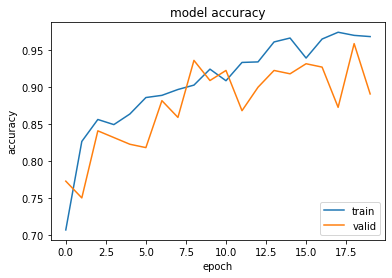

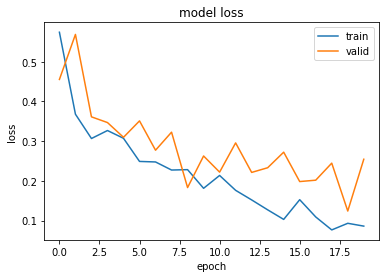

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

As can be seen on the *accuracy* and *loss* plot, the learning curve on the train data looks very good. However, it should be noted that the curve on the validation data develops very erratically. Thus, it is possible to build on this model architecture, but it certainly needs to be optimised

### Model 1.2 - with padding

Padding is used to reduce the loss of outer pixels and thus reduce the border effect. In the following, the influence of padding on the quality of the model is examined. Exactly the same model is used as before. Only the option Padding is activated.

In [16]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3,3), activation = 'relu', input_shape= (image_size,image_size, 4), padding="same"))
model_2.add(MaxPooling2D((2,2)))
model_2.add(Conv2D(64,(3,3), activation = 'relu'))
model_2.add(MaxPooling2D((2,2)))
model_2.add(Conv2D(64,(3,3), activation = 'relu'))

model_2.add(Flatten())
model_2.add(Dense(64, activation = 'relu'))
model_2.add(Dense(2, activation = 'softmax'))

model_2.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      1184      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 73984)            

In [18]:
model_2.input

<KerasTensor: shape=(None, 150, 150, 4) dtype=float32 (created by layer 'conv2d_3_input')>

In [19]:

name = f"Sandro_Conv_model_1.2 + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")

history = model_2.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)

Epoch 1/20
51/51 [==============================] - 23s 435ms/step - loss: 0.6946 - accuracy: 0.5667 - val_loss: 0.6456 - val_accuracy: 0.6045
Epoch 2/20
51/51 [==============================] - 22s 427ms/step - loss: 0.5611 - accuracy: 0.6951 - val_loss: 0.5066 - val_accuracy: 0.7545
Epoch 3/20
51/51 [==============================] - 22s 437ms/step - loss: 0.4366 - accuracy: 0.7735 - val_loss: 0.5002 - val_accuracy: 0.7273
Epoch 4/20
51/51 [==============================] - 23s 444ms/step - loss: 0.3775 - accuracy: 0.8029 - val_loss: 0.3673 - val_accuracy: 0.7818
Epoch 5/20
51/51 [==============================] - 22s 431ms/step - loss: 0.3109 - accuracy: 0.8513 - val_loss: 0.4371 - val_accuracy: 0.7545
Epoch 6/20
51/51 [==============================] - 22s 428ms/step - loss: 0.3042 - accuracy: 0.8494 - val_loss: 0.3219 - val_accuracy: 0.8409
Epoch 7/20
51/51 [==============================] - 22s 427ms/step - loss: 0.2694 - accuracy: 0.8824 - val_loss: 0.3121 - val_accuracy: 0.8773

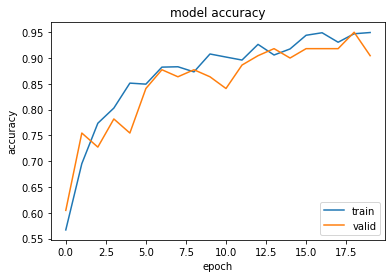

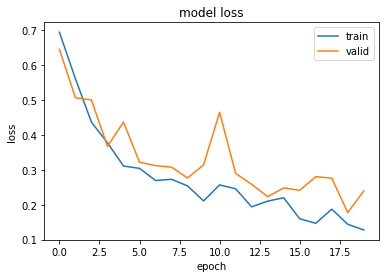

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

### Model 1.3 inkl. Drop-Out

The difference from the good training curve to the erratic validation curve could be an indication that the model is modelling *noise* from the training data. This results in a so-called overfit. To counteract this, a so-called drop-out layer is inserted. 

This has the effect that certain outputs are ignored with each training and thus the model is made more robust against overfitting.

In [21]:
model_3_drop = Sequential()

model_3_drop.add(Conv2D(32, (3,3), activation = 'relu', input_shape= (image_size,image_size, 4)))
model_3_drop.add(MaxPooling2D((2,2)))
model_3_drop.add(Conv2D(64,(3,3), activation = 'relu'))
model_3_drop.add(MaxPooling2D((2,2)))
model_3_drop.add(Conv2D(64,(3,3), activation = 'relu'))

model_3_drop.add(Flatten())
model_3_drop.add(Dropout(0.5))
model_3_drop.add(Dense(64, activation = 'relu'))
model_3_drop.add(Dense(2, activation = 'softmax'))

model_3_drop.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [22]:
model_3_drop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      1184      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 73984)            

In [23]:
name = f"Sandro_Conv_model_1.3 + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")

history = model_3_drop.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)

Epoch 1/20
51/51 [==============================] - 24s 451ms/step - loss: 0.6170 - accuracy: 0.6716 - val_loss: 0.4643 - val_accuracy: 0.7318
Epoch 2/20
51/51 [==============================] - 22s 435ms/step - loss: 0.4267 - accuracy: 0.7621 - val_loss: 0.4036 - val_accuracy: 0.7636
Epoch 3/20
51/51 [==============================] - 22s 428ms/step - loss: 0.3456 - accuracy: 0.8305 - val_loss: 0.3402 - val_accuracy: 0.8409
Epoch 4/20
51/51 [==============================] - 22s 426ms/step - loss: 0.2985 - accuracy: 0.8533 - val_loss: 0.3450 - val_accuracy: 0.8636
Epoch 5/20
51/51 [==============================] - 22s 428ms/step - loss: 0.2877 - accuracy: 0.8741 - val_loss: 0.2687 - val_accuracy: 0.8909
Epoch 6/20
51/51 [==============================] - 22s 427ms/step - loss: 0.3197 - accuracy: 0.8533 - val_loss: 0.4466 - val_accuracy: 0.7409
Epoch 7/20
51/51 [==============================] - 22s 427ms/step - loss: 0.2645 - accuracy: 0.8801 - val_loss: 0.2808 - val_accuracy: 0.8682

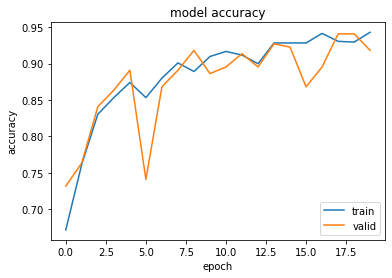

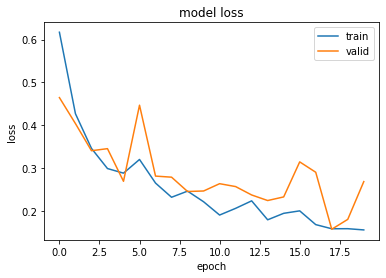

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

The positive influence of the drop-out layer can be seen in the somewhat smoother learning curves. Therefore, this setting is retained.

### Different Inputs

#### Numbers: 64, 64, 64

In [25]:
model_3_drop_1 = Sequential()

model_3_drop_1.add(Conv2D(64, (3,3), activation = 'relu', input_shape= (image_size,image_size, 4)))
model_3_drop_1.add(MaxPooling2D((2,2)))
model_3_drop_1.add(Conv2D(64,(3,3), activation = 'relu'))
model_3_drop_1.add(MaxPooling2D((2,2)))
model_3_drop_1.add(Conv2D(64,(3,3), activation = 'relu'))

model_3_drop_1.add(Flatten())
model_3_drop_1.add(Dropout(0.5))
model_3_drop_1.add(Dense(64, activation = 'relu'))
model_3_drop_1.add(Dense(2, activation = 'softmax'))

model_3_drop_1.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [26]:
name = f"Sandro_Conv_model_1.3.1 + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")

history = model_3_drop_1.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)

Epoch 1/20
51/51 [==============================] - 31s 586ms/step - loss: 0.6645 - accuracy: 0.6696 - val_loss: 0.4756 - val_accuracy: 0.7136
Epoch 2/20
51/51 [==============================] - 30s 577ms/step - loss: 0.4392 - accuracy: 0.7824 - val_loss: 0.3987 - val_accuracy: 0.7773
Epoch 3/20
51/51 [==============================] - 29s 575ms/step - loss: 0.3706 - accuracy: 0.7939 - val_loss: 0.3534 - val_accuracy: 0.8182
Epoch 4/20
51/51 [==============================] - 30s 582ms/step - loss: 0.3353 - accuracy: 0.8333 - val_loss: 0.3553 - val_accuracy: 0.8455
Epoch 5/20
51/51 [==============================] - 30s 579ms/step - loss: 0.3056 - accuracy: 0.8731 - val_loss: 0.3276 - val_accuracy: 0.8455
Epoch 6/20
51/51 [==============================] - 31s 616ms/step - loss: 0.2869 - accuracy: 0.8771 - val_loss: 0.3457 - val_accuracy: 0.8182
Epoch 7/20
51/51 [==============================] - 33s 655ms/step - loss: 0.2661 - accuracy: 0.8794 - val_loss: 0.2651 - val_accuracy: 0.8636

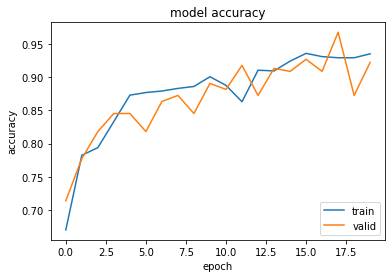

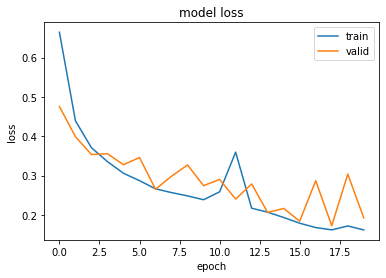

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

No improvement can be seen compared to model _3_drop.

#### Numbers: 128, 64, 64

In [28]:
model_3_drop_2 = Sequential()

model_3_drop_2.add(Conv2D(128, (3,3), activation = 'relu', input_shape= (image_size,image_size, 4)))
model_3_drop_2.add(MaxPooling2D((2,2)))
model_3_drop_2.add(Conv2D(64,(3,3), activation = 'relu'))
model_3_drop_2.add(MaxPooling2D((2,2)))
model_3_drop_2.add(Conv2D(64,(3,3), activation = 'relu'))

model_3_drop_2.add(Flatten())
model_3_drop_2.add(Dropout(0.5))
model_3_drop_2.add(Dense(64, activation = 'relu'))
model_3_drop_2.add(Dense(2, activation = 'softmax'))

model_3_drop_2.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [29]:
name = f"Sandro_Conv_model_1.3.2 + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")

history = model_3_drop_2.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)

Epoch 1/20
51/51 [==============================] - 53s 1s/step - loss: 0.6592 - accuracy: 0.6422 - val_loss: 0.6097 - val_accuracy: 0.6500
Epoch 2/20
51/51 [==============================] - 53s 1s/step - loss: 0.4929 - accuracy: 0.7037 - val_loss: 0.4051 - val_accuracy: 0.7364
Epoch 3/20
51/51 [==============================] - 51s 989ms/step - loss: 0.3871 - accuracy: 0.7863 - val_loss: 0.3333 - val_accuracy: 0.8227
Epoch 4/20
51/51 [==============================] - 51s 996ms/step - loss: 0.3367 - accuracy: 0.8451 - val_loss: 0.3334 - val_accuracy: 0.8455
Epoch 5/20
51/51 [==============================] - 53s 1s/step - loss: 0.3447 - accuracy: 0.8454 - val_loss: 0.3809 - val_accuracy: 0.7955
Epoch 6/20
51/51 [==============================] - 51s 991ms/step - loss: 0.3294 - accuracy: 0.8523 - val_loss: 0.3068 - val_accuracy: 0.8773
Epoch 7/20
51/51 [==============================] - 51s 999ms/step - loss: 0.2691 - accuracy: 0.8821 - val_loss: 0.3461 - val_accuracy: 0.8409
Epoch 8/

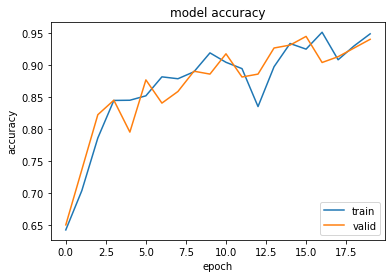

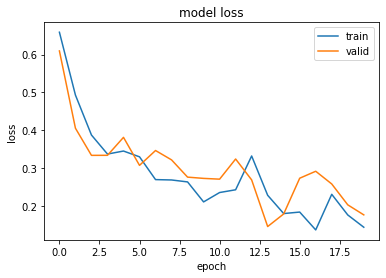

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

No improvement can be seen compared to model _3_drop.

#### Numbers: 32, 32, 64

In [31]:
model_3_drop_3 = Sequential()

model_3_drop_3.add(Conv2D(64, (3,3), activation = 'relu', input_shape= (image_size,image_size, 4)))
model_3_drop_3.add(MaxPooling2D((2,2)))
model_3_drop_3.add(Conv2D(32,(3,3), activation = 'relu'))
model_3_drop_3.add(MaxPooling2D((2,2)))
model_3_drop_3.add(Conv2D(128,(3,3), activation = 'relu'))

model_3_drop_3.add(Flatten())
model_3_drop_3.add(Dropout(0.5))
model_3_drop_3.add(Dense(64, activation = 'relu'))
model_3_drop_3.add(Dense(2, activation = 'softmax'))

model_3_drop_3.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [32]:
name = f"Sandro_Conv_model_1.3.3 + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")

history = model_3_drop_3.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)

Epoch 1/20
51/51 [==============================] - 28s 543ms/step - loss: 0.6577 - accuracy: 0.6283 - val_loss: 0.5366 - val_accuracy: 0.6045
Epoch 2/20
51/51 [==============================] - 28s 546ms/step - loss: 0.4764 - accuracy: 0.7216 - val_loss: 0.4413 - val_accuracy: 0.7545
Epoch 3/20
51/51 [==============================] - 27s 534ms/step - loss: 0.4138 - accuracy: 0.7750 - val_loss: 0.3836 - val_accuracy: 0.7727
Epoch 4/20
51/51 [==============================] - 27s 536ms/step - loss: 0.3506 - accuracy: 0.8048 - val_loss: 0.3428 - val_accuracy: 0.8136
Epoch 5/20
51/51 [==============================] - 28s 543ms/step - loss: 0.3355 - accuracy: 0.8382 - val_loss: 0.2731 - val_accuracy: 0.8682
Epoch 6/20
51/51 [==============================] - 27s 538ms/step - loss: 0.3153 - accuracy: 0.8702 - val_loss: 0.3311 - val_accuracy: 0.8182
Epoch 7/20
51/51 [==============================] - 27s 533ms/step - loss: 0.2803 - accuracy: 0.8781 - val_loss: 0.3360 - val_accuracy: 0.8500

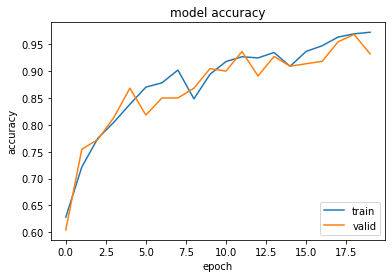

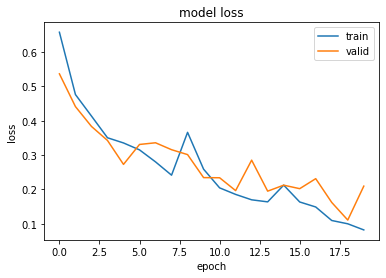

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

Bis jetzt das beste.

#### Numbers: 32, 128, 64

In [34]:
model_3_drop_4 = Sequential()

model_3_drop_4.add(Conv2D(32, (3,3), activation = 'relu', input_shape= (image_size,image_size, 4)))
model_3_drop_4.add(MaxPooling2D((2,2)))
model_3_drop_4.add(Conv2D(128,(3,3), activation = 'relu'))
model_3_drop_4.add(MaxPooling2D((2,2)))
model_3_drop_4.add(Conv2D(64,(3,3), activation = 'relu'))

model_3_drop_4.add(Flatten())
model_3_drop_4.add(Dropout(0.5))
model_3_drop_4.add(Dense(64, activation = 'relu'))
model_3_drop_4.add(Dense(2, activation = 'softmax'))

model_3_drop_4.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [35]:
name = f"Sandro_Conv_model_1.3.4 + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")

history = model_3_drop_4.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)

Epoch 1/20
51/51 [==============================] - 27s 525ms/step - loss: 0.7245 - accuracy: 0.6353 - val_loss: 0.6164 - val_accuracy: 0.6773
Epoch 2/20
51/51 [==============================] - 26s 519ms/step - loss: 0.5409 - accuracy: 0.7206 - val_loss: 0.4924 - val_accuracy: 0.7318
Epoch 3/20
51/51 [==============================] - 27s 523ms/step - loss: 0.4113 - accuracy: 0.7839 - val_loss: 0.3423 - val_accuracy: 0.8409
Epoch 4/20
51/51 [==============================] - 26s 510ms/step - loss: 0.3481 - accuracy: 0.8305 - val_loss: 0.3468 - val_accuracy: 0.8318
Epoch 5/20
51/51 [==============================] - 27s 535ms/step - loss: 0.2826 - accuracy: 0.8775 - val_loss: 0.3407 - val_accuracy: 0.8318
Epoch 6/20
51/51 [==============================] - 26s 516ms/step - loss: 0.2821 - accuracy: 0.8667 - val_loss: 0.2575 - val_accuracy: 0.9000
Epoch 7/20
51/51 [==============================] - 26s 517ms/step - loss: 0.2488 - accuracy: 0.8853 - val_loss: 0.2501 - val_accuracy: 0.9000

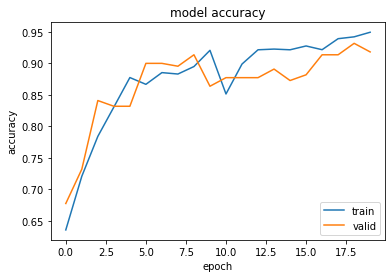

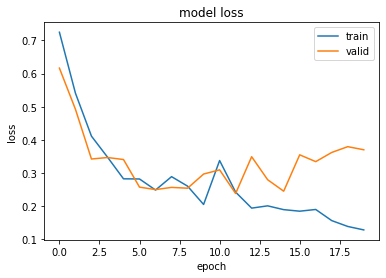

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

So far the second best.

#### Numbers: 32, 32, 128

In [37]:
model_3_drop_5 = Sequential()

model_3_drop_5.add(Conv2D(32, (3,3), activation = 'relu', input_shape= (image_size,image_size, 4)))
model_3_drop_5.add(MaxPooling2D((2,2)))
model_3_drop_5.add(Conv2D(32,(3,3), activation = 'relu'))
model_3_drop_5.add(MaxPooling2D((2,2)))
model_3_drop_5.add(Conv2D(128,(3,3), activation = 'relu'))

model_3_drop_5.add(Flatten())
model_3_drop_5.add(Dropout(0.5))
model_3_drop_5.add(Dense(64, activation = 'relu'))
model_3_drop_5.add(Dense(2, activation = 'softmax'))

model_3_drop_5.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [38]:
name = f"Sandro_Conv_model_1.3.5 + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")

history = model_3_drop_5.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)

Epoch 1/20
51/51 [==============================] - 20s 382ms/step - loss: 0.5690 - accuracy: 0.7225 - val_loss: 0.3727 - val_accuracy: 0.8000
Epoch 2/20
51/51 [==============================] - 19s 380ms/step - loss: 0.3636 - accuracy: 0.8098 - val_loss: 0.3470 - val_accuracy: 0.8227
Epoch 3/20
51/51 [==============================] - 19s 375ms/step - loss: 0.3490 - accuracy: 0.8464 - val_loss: 0.3440 - val_accuracy: 0.8318
Epoch 4/20
51/51 [==============================] - 19s 377ms/step - loss: 0.3024 - accuracy: 0.8608 - val_loss: 0.3023 - val_accuracy: 0.8727
Epoch 5/20
51/51 [==============================] - 20s 385ms/step - loss: 0.2809 - accuracy: 0.8814 - val_loss: 0.3357 - val_accuracy: 0.8364
Epoch 6/20
51/51 [==============================] - 20s 384ms/step - loss: 0.2709 - accuracy: 0.8882 - val_loss: 0.3034 - val_accuracy: 0.8545
Epoch 7/20
51/51 [==============================] - 19s 380ms/step - loss: 0.2497 - accuracy: 0.9010 - val_loss: 0.3418 - val_accuracy: 0.8273

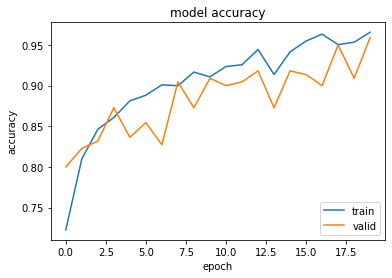

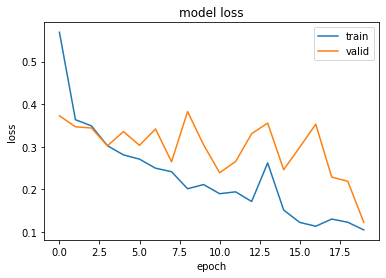

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

#### Numbers: 32, 32, 32

In [40]:
model_3_drop_5 = Sequential()

model_3_drop_5.add(Conv2D(32, (3,3), activation = 'relu', input_shape= (image_size,image_size, 4)))
model_3_drop_5.add(MaxPooling2D((2,2)))
model_3_drop_5.add(Conv2D(32,(3,3), activation = 'relu'))
model_3_drop_5.add(MaxPooling2D((2,2)))
model_3_drop_5.add(Conv2D(128,(3,3), activation = 'relu'))

model_3_drop_5.add(Flatten())
model_3_drop_5.add(Dropout(0.5))
model_3_drop_5.add(Dense(64, activation = 'relu'))
model_3_drop_5.add(Dense(2, activation = 'softmax'))

model_3_drop_5.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [41]:
name = f"Sandro_Conv_model_1.3.5 + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")

history = model_3_drop_5.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)

Epoch 1/20
51/51 [==============================] - 21s 389ms/step - loss: 0.6972 - accuracy: 0.6363 - val_loss: 0.4302 - val_accuracy: 0.7864
Epoch 2/20
51/51 [==============================] - 19s 380ms/step - loss: 0.4145 - accuracy: 0.7765 - val_loss: 0.4596 - val_accuracy: 0.7318
Epoch 3/20
51/51 [==============================] - 20s 382ms/step - loss: 0.3825 - accuracy: 0.7948 - val_loss: 0.3859 - val_accuracy: 0.7955
Epoch 4/20
51/51 [==============================] - 19s 378ms/step - loss: 0.3430 - accuracy: 0.8335 - val_loss: 0.3080 - val_accuracy: 0.8364
Epoch 5/20
51/51 [==============================] - 19s 376ms/step - loss: 0.3718 - accuracy: 0.8225 - val_loss: 0.3483 - val_accuracy: 0.8091
Epoch 6/20
51/51 [==============================] - 21s 417ms/step - loss: 0.3010 - accuracy: 0.8716 - val_loss: 0.3751 - val_accuracy: 0.8182
Epoch 7/20
51/51 [==============================] - 20s 383ms/step - loss: 0.3032 - accuracy: 0.8662 - val_loss: 0.2657 - val_accuracy: 0.9000

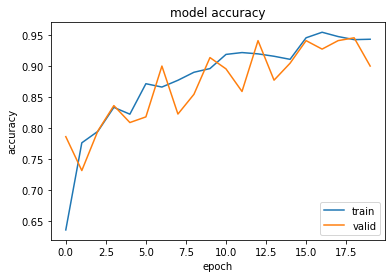

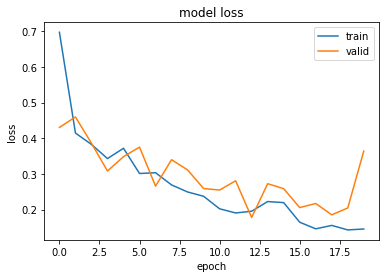

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

The *model_3_drop_5* is the best in terms of validation accuracy. For this reason, this model is defined as the best model from scratch.

In [43]:
model_3_drop_5.save("./models/Model_Sandro_best.h5")

In [44]:
model_3_drop_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 64)      2368      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       36992     
                                                                 
 flatten_5 (Flatten)         (None, 147968)           